In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data/Sales_August_2019.csv
/kaggle/input/sales-data/Sales_May_2019.csv
/kaggle/input/sales-data/Sales_February_2019.csv
/kaggle/input/sales-data/Sales_November_2019.csv
/kaggle/input/sales-data/Sales_January_2019.csv
/kaggle/input/sales-data/Sales_March_2019.csv
/kaggle/input/sales-data/Sales_September_2019.csv
/kaggle/input/sales-data/Sales_April_2019.csv
/kaggle/input/sales-data/Sales_July_2019.csv
/kaggle/input/sales-data/Sales_October_2019.csv
/kaggle/input/sales-data/Sales_June_2019.csv
/kaggle/input/sales-data/Sales_December_2019.csv


In [2]:
files=[file for file in os.listdir('/kaggle/input/sales-data')]
for file in files:
    print(file)

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


In [3]:
sales_all=pd.DataFrame()
for file in files:
    df=pd.read_csv('/kaggle/input/sales-data/'+file)
    sales_all=pd.concat([sales_all,df])

In [4]:
sales_all.to_csv('sales_all.csv',index=False)

In [5]:
sales_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [6]:
sales_all.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
sales_all=sales_all.dropna(how='any')

In [8]:
sales_all.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Best month for sale

In [9]:
def month(x):
    return x.split('/')[0]

In [10]:
sales_all['month']=sales_all['Order Date'].apply(month)

In [11]:
sales_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [12]:
sales_all['month'].dtypes

dtype('O')

In [13]:
sales_all['month'].unique()

array(['08', 'Order Date', '09', '05', '06', '02', '03', '11', '12', '01',
       '04', '10', '07'], dtype=object)

In [14]:
sales_all=sales_all.loc[sales_all['month']!='Order Date',:]
sales_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [15]:
sales_all['month']=sales_all['month'].astype(int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:

sales_all['Quantity Ordered']=sales_all['Quantity Ordered'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
sales_all['Price Each']=sales_all['Price Each'].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
sales_all.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [19]:
sales_all['sales']=sales_all['Quantity Ordered']*sales_all['Price Each']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
sales_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [21]:
monthly_sales=sales_all.groupby('month')['sales'].sum()
monthly_sales=pd.DataFrame(monthly_sales)
monthly_sales

,sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


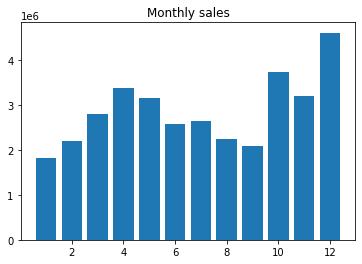

In [22]:
plt.bar(monthly_sales.index,monthly_sales['sales'])
plt.title('Monthly sales');

# Which city has maximum order

In [23]:
def city(x):
    return x.split(',')[1]

In [24]:
sales_all['city']=sales_all['Purchase Address'].apply(city)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
sales_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


<AxesSubplot:xlabel='city'>

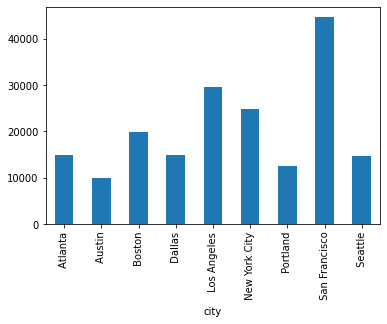

In [26]:
sales_all.groupby('city')['city'].count().plot.bar()

# Time of maximum sales of Product

In [27]:
sales_all['Order Date'].dtypes

dtype('O')

In [28]:
sales_all['hour']=pd.to_datetime(sales_all['Order Date']).dt.hour

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
sales_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [30]:
orders=[]
hours=[]
for hour,order in sales_all.groupby('hour'):
    hours.append(hour)
    orders.append(len(order))

In [31]:
sale_time=pd.DataFrame(zip(hours,orders))
sale_time

,0,1
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


In [32]:
sale_time.rename(columns={0:'hour',1:'hourly_sale'},inplace=True)
sale_time

,hour,hourly_sale
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


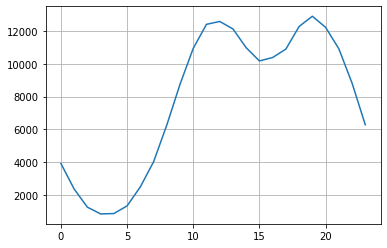

In [33]:
plt.plot(sale_time['hour'],sale_time['hourly_sale'])
plt.grid()

# Most sold product

<AxesSubplot:xlabel='Product'>

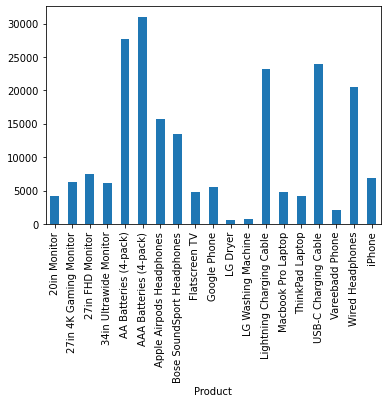

In [34]:
sales_all.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [35]:
sales_all.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [36]:
products=sales_all.groupby('Product')['Quantity Ordered'].sum().index
quantity=sales_all.groupby('Product')['Quantity Ordered'].sum()
prices=sales_all.groupby('Product')['Price Each'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


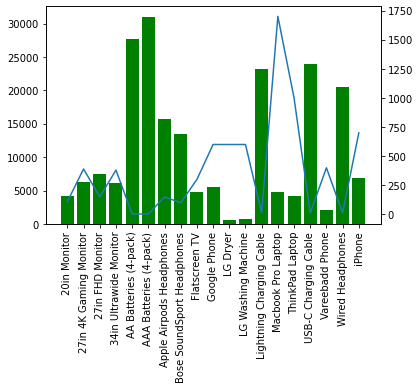

In [37]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices)
ax1.set_xticklabels(products,rotation=90);

# Products which are most often sold together

In [38]:
# Same order ID products are sold together
df=sales_all['Order ID'].duplicated(keep=False)
df1=sales_all[df]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco,9
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10


In [39]:
df1['grouped']=df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10,"Google Phone,Wired Headphones"


In [41]:
df1=df1.drop_duplicates(subset=['Order ID'])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City,10,"Google Phone,Wired Headphones"
132,236799,Google Phone,1,600.00,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco,12,"Google Phone,Wired Headphones"
163,236829,Vareebadd Phone,1,400.00,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles,8,"Vareebadd Phone,USB-C Charging Cable"


<AxesSubplot:ylabel='grouped'>

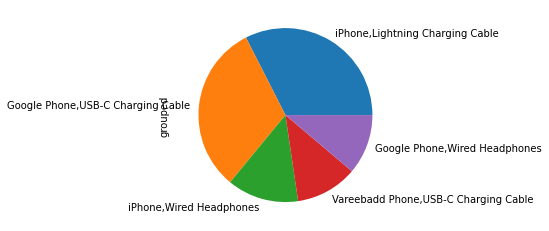

In [42]:
df1['grouped'].value_counts()[:5].plot.pie()